In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("nigeria_houses_data.csv")
df

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0
...,...,...,...,...,...,...,...,...
24321,2.0,2.0,2.0,4.0,Block of Flats,Kabusa,Abuja,15000000.0
24322,4.0,5.0,5.0,4.0,Block of Flats,Ado-Odo/Ota,Ogun,25000000.0
24323,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,68000000.0
24324,3.0,4.0,4.0,3.0,Block of Flats,Victoria Island (VI),Lagos,78000000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24326 non-null  float64
 1   bathrooms      24326 non-null  float64
 2   toilets        24326 non-null  float64
 3   parking_space  24326 non-null  float64
 4   title          24326 non-null  object 
 5   town           24326 non-null  object 
 6   state          24326 non-null  object 
 7   price          24326 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.5+ MB


In [4]:
df.describe(include='all')

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
count,24326.000000,24326.000000,24326.000000,24326.000000,24326,24326,24326,2.432600e+04
unique,NaN,NaN,NaN,NaN,7,189,25,NaN
top,NaN,NaN,NaN,NaN,Detached Duplex,Lekki,Lagos,NaN
freq,NaN,NaN,NaN,NaN,13992,10895,18445,NaN
mean,4.338814,4.600798,5.176355,4.041725,NaN,NaN,NaN,3.013802e+08
std,1.138497,1.163161,1.226253,1.399936,NaN,NaN,NaN,1.220403e+10
min,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,9.000000e+04
25%,4.000000,4.000000,5.000000,4.000000,NaN,NaN,NaN,5.200000e+07
50%,4.000000,5.000000,5.000000,4.000000,NaN,NaN,NaN,8.500000e+07
75%,5.000000,5.000000,6.000000,4.000000,NaN,NaN,NaN,1.600000e+08


In [5]:




# Clean text for consistency
df['town'] = df['town'].str.strip().str.title()
df['state'] = df['state'].str.strip().str.title()

# Group by State and list unique Towns under each State
state_town_mapping = df.groupby('state')['town'] \
                        .unique() \
                        .reset_index(name='town')

# Optional: Sort towns alphabetically within each state
state_town_mapping['town'] = state_town_mapping['town'].apply(lambda x: sorted(x))

# Display all states and their towns
for _, row in state_town_mapping.iterrows():
    state = row['state']
    towns = row['town']
    print(f"\n📍 State: {state}")
    for town in towns:
        print(f"   - {town}")


📍 State: Abia
   - Aba
   - Umuahia

📍 State: Abuja
   - Apo
   - Asokoro District
   - Bwari
   - Central Business District
   - Dakibiyu
   - Dakwo
   - Dape
   - Dei-Dei
   - Diplomatic Zones
   - Duboyi
   - Durumi
   - Dutse
   - Gaduwa
   - Galadimawa
   - Garki
   - Gudu
   - Guzape District
   - Gwagwalada
   - Gwarinpa
   - Idu Industrial
   - Jabi
   - Jahi
   - Jikwoyi
   - Kabusa
   - Kado
   - Kafe
   - Kagini
   - Karmo
   - Karsana
   - Karshi
   - Karu
   - Katampe
   - Kaura
   - Kubwa
   - Kuje
   - Kukwaba
   - Kurudu
   - Kyami
   - Life Camp
   - Lokogoma District
   - Lugbe District
   - Mabushi
   - Maitama District
   - Mararaba
   - Mbora (Nbora)
   - Mpape
   - Nyanya
   - Orozo
   - Utako
   - Wumba
   - Wuse
   - Wuse 2
   - Wuye

📍 State: Akwa Ibom
   - Eket
   - Ikot Ekpene
   - Uyo

📍 State: Anambara
   - Agege
   - Ajah
   - Akure
   - Alimosho
   - Arepo
   - Gbagada
   - Guzape District
   - Gwarinpa
   - Ibadan
   - Ibeju Lekki
   - Ifako-Ijaiye
   -

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df = df[df['state'].isin(['Lagos', 'Abuja'])].reset_index(drop= True)
df

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,4.500000e+08
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,8.000000e+08
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,1.200000e+08
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,4.000000e+07
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,7.500000e+07
...,...,...,...,...,...,...,...,...
11684,5.0,6.0,6.0,8.0,Detached Duplex,Isolo,Lagos,8.000000e+07
11685,8.0,8.0,9.0,4.0,Detached Duplex,Guzape District,Abuja,1.000000e+09
11686,3.0,4.0,4.0,5.0,Detached Duplex,Lekki,Lagos,8.000000e+07
11687,2.0,2.0,2.0,4.0,Block of Flats,Kabusa,Abuja,1.500000e+07


In [8]:
df.isnull().sum()

bedrooms         0
bathrooms        0
toilets          0
parking_space    0
title            0
town             0
state            0
price            0
dtype: int64

In [9]:
columns_to_convert = ['bedrooms','bathrooms','toilets','parking_space','price']
df[columns_to_convert] = df[columns_to_convert].astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11689 entries, 0 to 11688
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   bedrooms       11689 non-null  int32 
 1   bathrooms      11689 non-null  int32 
 2   toilets        11689 non-null  int32 
 3   parking_space  11689 non-null  int32 
 4   title          11689 non-null  object
 5   town           11689 non-null  object
 6   state          11689 non-null  object
 7   price          11689 non-null  int32 
dtypes: int32(5), object(3)
memory usage: 502.4+ KB


In [11]:
#exploring outliers  bedrooms vs toilets
# drop apartments with less than 4 rooms with 9 toilets because they are extreme and unrealistic.
df.drop(df[(df['toilets'] == 9) & (df['bedrooms'] < 4)].index, axis=0, inplace=True)
df.shape




(11684, 8)

In [12]:

# drop apartments with less than 4 rooms with 8 toilets because they are extreme and unrealistic.
df.drop(df[(df['toilets'] == 8) & (df['bedrooms'] < 4)].index, axis=0, inplace=True)
df.shape

(11675, 8)

In [13]:
# drop apartments with less than 9 rooms with less than 4 toilets because they are extreme and unrealistic.
df.drop(df[(df['toilets'] <4) & (df['bedrooms'] == 9)].index, axis=0, inplace=True)
df.shape

(11628, 8)

In [14]:
# drop apartments with 8 rooms with less than 3 toilets because they are extreme and unrealistic.
df.drop(df[(df['toilets'] <3) & (df['bedrooms'] == 8)].index, axis=0, inplace=True)
df.shape

(11598, 8)

In [15]:



# drop apartments with 7 rooms with less than 3 toilets because they are extreme and unrealistic.
df.drop(df[(df['toilets'] <3) & (df['bedrooms'] ==7)].index, axis=0, inplace=True)
df.shape

(11582, 8)

In [16]:
# drop apartments with 6 rooms with less than 3 toilets because they are extreme and unrealistic.
df.drop(df[(df['toilets'] <3) & (df['bedrooms'] ==6)].index, axis=0, inplace=True)
df.shape

(11569, 8)

In [17]:
#exploring bedrooms and bathrooms
# drop apartments with 8 bathrooms with less than 3 bedrooms because they are extreme and unrealistic.
df.drop(df[(df['bathrooms'] ==8) & (df['bedrooms'] <3)].index, axis=0, inplace=True)
df.shape


(11568, 8)

In [18]:


# List of numerical columns to check for outliers
num_cols = ['bedrooms', 'bathrooms', 'toilets', 'parking_space', 'price']

# Loop through each column and remove outliers using IQR
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Optional: print new shape
print("Dataset shape after outlier removal:", df.shape)


Dataset shape after outlier removal: (8362, 8)


In [19]:
# List of numerical columns to check for outliers
num_cols = ['bedrooms', 'bathrooms', 'toilets', 'parking_space', 'price']

# Function to detect outliers using IQR
def detect_outliers_iqr(df, columns):
    outlier_indices = {}
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Get outlier rows
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_indices[col] = outliers.index.tolist()

        print(f"\n{col.upper()} - Outliers Found: {len(outliers)}")
        print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
        print(outliers[[col]])

    return outlier_indices

# Call the function
outlier_dict = detect_outliers_iqr(df, num_cols)


BEDROOMS - Outliers Found: 0
Lower Bound: 2.5, Upper Bound: 6.5
Empty DataFrame
Columns: [bedrooms]
Index: []

BATHROOMS - Outliers Found: 0
Lower Bound: 2.5, Upper Bound: 6.5
Empty DataFrame
Columns: [bathrooms]
Index: []

TOILETS - Outliers Found: 0
Lower Bound: 3.5, Upper Bound: 7.5
Empty DataFrame
Columns: [toilets]
Index: []

PARKING_SPACE - Outliers Found: 0
Lower Bound: 0.0, Upper Bound: 8.0
Empty DataFrame
Columns: [parking_space]
Index: []

PRICE - Outliers Found: 294
Lower Bound: -92500000.0, Upper Bound: 279500000.0
           price
49     300000000
58     330000000
63     280000000
104    300000000
111    325000000
...          ...
11470  290000000
11485  320000000
11522  280000000
11559  300000000
11640  320000000

[294 rows x 1 columns]


In [20]:
# Remove outliers from the 'price' column only
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers in price and update df
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Optional: Confirm the new shape
print("Dataset shape after removing price outliers:", df.shape)


Dataset shape after removing price outliers: (8068, 8)


In [21]:
# Recalculate IQR for parking_space just to be safe
Q1 = df['parking_space'].quantile(0.25)
Q3 = df['parking_space'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['parking_space'] >= lower_bound) & (df['parking_space'] <= upper_bound)]

# Optional: Reset index for a clean DataFrame
df.reset_index(drop=True, inplace=True)


In [22]:
print(df.isnull().sum())


bedrooms         0
bathrooms        0
toilets          0
parking_space    0
title            0
town             0
state            0
price            0
dtype: int64


In [23]:
correlation_with_price = df.corr(numeric_only=True)['price'].sort_values(ascending=False)
print(correlation_with_price)


price            1.000000
bedrooms         0.431503
toilets          0.381162
bathrooms        0.332043
parking_space    0.129893
Name: price, dtype: float64


In [24]:
df['bath_bed_ratio'] = df['bathrooms'] / df['bedrooms']


In [25]:
df['toilet_bed_ratio'] = df['toilets'] / df['bedrooms']


In [26]:
df['total_rooms'] = df['bedrooms'] + df['bathrooms'] + df['toilets']


In [27]:
df['luxury_score'] = (
    df['bedrooms'] * 0.4 +
    df['bathrooms'] * 0.3 +
    df['toilets'] * 0.2 +
    df['parking_space'] * 0.1
)


In [28]:
df

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,bath_bed_ratio,toilet_bed_ratio,total_rooms,luxury_score
0,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000,1.250000,1.250000,14,4.5
1,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000,1.000000,1.250000,13,4.4
2,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000,1.000000,1.250000,13,4.0
3,4,5,5,4,Detached Duplex,Lekki,Lagos,65000000,1.250000,1.250000,14,4.5
4,4,4,5,5,Detached Duplex,Ajah,Lagos,60000000,1.000000,1.250000,13,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...
8063,6,5,6,5,Detached Duplex,Ibeju Lekki,Lagos,100000000,0.833333,1.000000,17,5.6
8064,5,5,6,1,Detached Duplex,Apo,Abuja,40000000,1.000000,1.200000,16,4.8
8065,5,6,6,8,Detached Duplex,Isolo,Lagos,80000000,1.200000,1.200000,17,5.8
8066,3,4,4,5,Detached Duplex,Lekki,Lagos,80000000,1.333333,1.333333,11,3.7


In [29]:
correlation_with_price = df.corr(numeric_only=True)['price'].sort_values(ascending=False)
print(correlation_with_price)

price               1.000000
bedrooms            0.431503
luxury_score        0.421031
total_rooms         0.416701
toilets             0.381162
bathrooms           0.332043
parking_space       0.129893
bath_bed_ratio     -0.134643
toilet_bed_ratio   -0.193538
Name: price, dtype: float64


In [30]:
# Drop columns with weak or negative impact on price
df.drop(['bath_bed_ratio', 'toilet_bed_ratio'], axis=1, inplace=True)
print("Remaining columns:", df.columns.tolist())

Remaining columns: ['bedrooms', 'bathrooms', 'toilets', 'parking_space', 'title', 'town', 'state', 'price', 'total_rooms', 'luxury_score']


In [31]:
print("Maximum luxury score in dataset:", df['luxury_score'].max())
print("Minimum luxury score in dataset:", df['luxury_score'].min())


Maximum luxury score in dataset: 6.4
Minimum luxury score in dataset: 3.0000000000000004


In [32]:
correlation_with_price = df.corr(numeric_only=True)['price'].sort_values(ascending=False)
print(correlation_with_price)

price            1.000000
bedrooms         0.431503
luxury_score     0.421031
total_rooms      0.416701
toilets          0.381162
bathrooms        0.332043
parking_space    0.129893
Name: price, dtype: float64


In [33]:
# Row with the minimum price
min_price_row = df[df['price'] == df['price'].min()]
print("🏷️ Property with Minimum Price:")
print(min_price_row)

# Row with the maximum price
max_price_row = df[df['price'] == df['price'].max()]
print("\n💰 Property with Maximum Price:")
print(max_price_row)


🏷️ Property with Minimum Price:
      bedrooms  bathrooms  toilets  parking_space            title   town  \
3003         5          5        6              4  Detached Duplex  Lekki   

      state   price  total_rooms  luxury_score  
3003  Lagos  400000           16           5.1  

💰 Property with Maximum Price:
      bedrooms  bathrooms  toilets  parking_space                   title  \
98           6          6        7              4         Detached Duplex   
1883         4          4        5              6         Detached Duplex   
2052         5          6        7              5         Detached Duplex   
2211         6          6        7              6         Detached Duplex   
2777         5          5        6              4         Detached Duplex   
2971         5          5        6              4    Semi Detached Duplex   
3341         6          6        7              7         Detached Duplex   
3792         5          5        6              6         Detached 

Listing type distribution:
listing_type
sale    8003
rent      65
Name: count, dtype: int64

Sample rent listings:
       price     town  state                   title
142  4000000  Ikorodu  Lagos       Detached Bungalow
254  6000000    Ikoyi  Lagos         Detached Duplex
355  4000000    Ikoyi  Lagos          Block of Flats
620  1750000    Ikoyi  Lagos          Block of Flats
814  8000000    Ayobo  Lagos  Semi Detached Bungalow


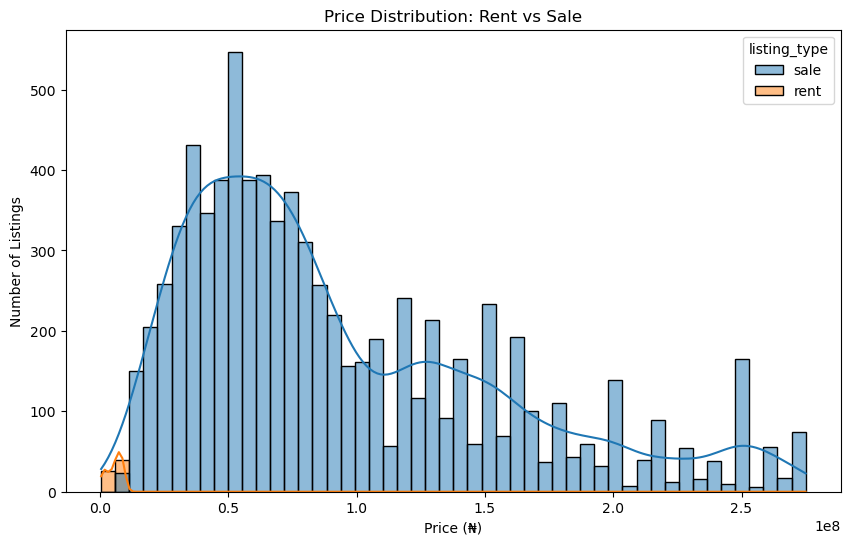


Filtered dataset shape: (8003, 11)
Listing types after filtering: ['sale']


In [34]:

import seaborn as sns
import matplotlib.pyplot as plt

# ✅ 1. Set threshold to classify rents vs sales
price_threshold = 10_000_000  # ₦10 million is a sensible cutoff

# ✅ 2. Create a new column 'listing_type'
df['listing_type'] = df['price'].apply(lambda x: 'rent' if x < price_threshold else 'sale')

# ✅ 3. Check classification counts
print("Listing type distribution:")
print(df['listing_type'].value_counts())

# ✅ 4. View examples of rent listings (optional)
print("\nSample rent listings:")
print(df[df['listing_type'] == 'rent'][['price', 'town', 'state', 'title']].head())

# ✅ 5. Visualize distribution (optional but helpful)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price', hue='listing_type', bins=50, kde=True)
plt.title("Price Distribution: Rent vs Sale")
plt.xlabel("Price (₦)")
plt.ylabel("Number of Listings")
plt.show()

# ✅ 6. (Optional) Keep only sale listings for price prediction model
df = df[df['listing_type'] == 'sale'].reset_index(drop=True)

# ✅ 7. Confirm filtering
print(f"\nFiltered dataset shape: {df.shape}")
print("Listing types after filtering:", df['listing_type'].unique())


In [35]:
df


,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,total_rooms,luxury_score,listing_type
0,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000,14,4.5,sale
1,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000,13,4.4,sale
2,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000,13,4.0,sale
3,4,5,5,4,Detached Duplex,Lekki,Lagos,65000000,14,4.5,sale
4,4,4,5,5,Detached Duplex,Ajah,Lagos,60000000,13,4.3,sale
...,...,...,...,...,...,...,...,...,...,...,...
7998,6,5,6,5,Detached Duplex,Ibeju Lekki,Lagos,100000000,17,5.6,sale
7999,5,5,6,1,Detached Duplex,Apo,Abuja,40000000,16,4.8,sale
8000,5,6,6,8,Detached Duplex,Isolo,Lagos,80000000,17,5.8,sale
8001,3,4,4,5,Detached Duplex,Lekki,Lagos,80000000,11,3.7,sale


In [36]:
# Step 1: Get the max luxury score
max_luxury = df['luxury_score'].max()

# Step 2: Normalize and overwrite the original luxury_score
df['luxury_score'] = (df['luxury_score'] / max_luxury) * 10

# Step 3: (Optional) Round to one decimal place for readability
df['luxury_score'] = df['luxury_score'].round(1)

# Step 4: Check the new values
print(df['luxury_score'].describe())


count    8003.000000
mean        7.022941
std         1.130419
min         4.700000
25%         6.400000
50%         7.000000
75%         8.000000
max        10.000000
Name: luxury_score, dtype: float64


In [37]:
df

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,total_rooms,luxury_score,listing_type
0,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000,14,7.0,sale
1,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000,13,6.9,sale
2,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000,13,6.2,sale
3,4,5,5,4,Detached Duplex,Lekki,Lagos,65000000,14,7.0,sale
4,4,4,5,5,Detached Duplex,Ajah,Lagos,60000000,13,6.7,sale
...,...,...,...,...,...,...,...,...,...,...,...
7998,6,5,6,5,Detached Duplex,Ibeju Lekki,Lagos,100000000,17,8.8,sale
7999,5,5,6,1,Detached Duplex,Apo,Abuja,40000000,16,7.5,sale
8000,5,6,6,8,Detached Duplex,Isolo,Lagos,80000000,17,9.1,sale
8001,3,4,4,5,Detached Duplex,Lekki,Lagos,80000000,11,5.8,sale


In [38]:

# Step 1: Get the current maximum luxury score
max_luxury = df['luxury_score'].max()

# Step 2: Normalize the luxury score to 0–10 scale
df['luxury_score'] = (df['luxury_score'] / max_luxury) * 10

# Step 3: Round to the nearest 0.5
df['luxury_score'] = (df['luxury_score'] * 2).round() / 2

# Step 4: (Optional) View the new unique values in the column
print(sorted(df['luxury_score'].unique()))


[4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0]


In [39]:
df

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,total_rooms,luxury_score,listing_type
0,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000,14,7.0,sale
1,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000,13,7.0,sale
2,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000,13,6.0,sale
3,4,5,5,4,Detached Duplex,Lekki,Lagos,65000000,14,7.0,sale
4,4,4,5,5,Detached Duplex,Ajah,Lagos,60000000,13,6.5,sale
...,...,...,...,...,...,...,...,...,...,...,...
7998,6,5,6,5,Detached Duplex,Ibeju Lekki,Lagos,100000000,17,9.0,sale
7999,5,5,6,1,Detached Duplex,Apo,Abuja,40000000,16,7.5,sale
8000,5,6,6,8,Detached Duplex,Isolo,Lagos,80000000,17,9.0,sale
8001,3,4,4,5,Detached Duplex,Lekki,Lagos,80000000,11,6.0,sale


In [40]:
df.drop('total_rooms', axis=1, inplace=True)
df.drop('luxury_score', axis=1, inplace=True)

In [41]:
df

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,listing_type
0,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000,sale
1,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000,sale
2,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000,sale
3,4,5,5,4,Detached Duplex,Lekki,Lagos,65000000,sale
4,4,4,5,5,Detached Duplex,Ajah,Lagos,60000000,sale
...,...,...,...,...,...,...,...,...,...
7998,6,5,6,5,Detached Duplex,Ibeju Lekki,Lagos,100000000,sale
7999,5,5,6,1,Detached Duplex,Apo,Abuja,40000000,sale
8000,5,6,6,8,Detached Duplex,Isolo,Lagos,80000000,sale
8001,3,4,4,5,Detached Duplex,Lekki,Lagos,80000000,sale


In [42]:
# df.to_csv("house predicton dataset.csv", index=False)

In [43]:
df.head() 

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,listing_type
0,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000,sale
1,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000,sale
2,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000,sale
3,4,5,5,4,Detached Duplex,Lekki,Lagos,65000000,sale
4,4,4,5,5,Detached Duplex,Ajah,Lagos,60000000,sale


In [45]:
df.to_csv("PriceLens_clean_dataset.csv", index=False) 


In [46]:
df = pd.read_csv('PriceLens_clean_dataset.csv')
df

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,listing_type
0,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000,sale
1,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000,sale
2,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000,sale
3,4,5,5,4,Detached Duplex,Lekki,Lagos,65000000,sale
4,4,4,5,5,Detached Duplex,Ajah,Lagos,60000000,sale
...,...,...,...,...,...,...,...,...,...
7998,6,5,6,5,Detached Duplex,Ibeju Lekki,Lagos,100000000,sale
7999,5,5,6,1,Detached Duplex,Apo,Abuja,40000000,sale
8000,5,6,6,8,Detached Duplex,Isolo,Lagos,80000000,sale
8001,3,4,4,5,Detached Duplex,Lekki,Lagos,80000000,sale


In [49]:
count = (df['listing_type'] == 'sale').sum()

In [50]:
print(count)

8003


In [51]:
df['listing_type'] = np.where(df['price'] < 150_000_000, 'rent', 'sale')

In [52]:
df

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,listing_type
0,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000,rent
1,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000,rent
2,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000,rent
3,4,5,5,4,Detached Duplex,Lekki,Lagos,65000000,rent
4,4,4,5,5,Detached Duplex,Ajah,Lagos,60000000,rent
...,...,...,...,...,...,...,...,...,...
7998,6,5,6,5,Detached Duplex,Ibeju Lekki,Lagos,100000000,rent
7999,5,5,6,1,Detached Duplex,Apo,Abuja,40000000,rent
8000,5,6,6,8,Detached Duplex,Isolo,Lagos,80000000,rent
8001,3,4,4,5,Detached Duplex,Lekki,Lagos,80000000,rent


In [58]:
count_rent = (df['listing_type'] == 'rent').sum()
count_sale = (df['listing_type'] == 'sale').sum()
print(f" There are {count_rent} rented houses and {count_sale} houses for sale")

 There are 6408 rented houses and 1595 houses for sale


In [59]:
df.head

<bound method NDFrame.head of       bedrooms  bathrooms  toilets  parking_space                 title  \
0            4          5        5              4       Detached Duplex   
1            4          4        5              6       Detached Duplex   
2            4          4        5              2  Semi Detached Duplex   
3            4          5        5              4       Detached Duplex   
4            4          4        5              5       Detached Duplex   
...        ...        ...      ...            ...                   ...   
7998         6          5        6              5       Detached Duplex   
7999         5          5        6              1       Detached Duplex   
8000         5          6        6              8       Detached Duplex   
8001         3          4        4              5       Detached Duplex   
8002         3          4        4              3        Block of Flats   

                      town  state      price listing_type  
0        

In [61]:
df.to_csv("PriceLens_clean_dataset.csv", index=False) 